In [1]:
# speed
#list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time
start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time()-start)

3.203939199447632


In [3]:
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a+b
print(time.time()-start)

0.0274200439453125


In [4]:
3.20/0.02

160.0

In [7]:
# memory
import sys
a = [i for i in range(10000000)]
sys.getsizeof(a)

89095160

In [11]:
a = np.arange(10000000,dtype = np.int8)
sys.getsizeof(a)

10000112

In [15]:
# convience
a = np.arange(24).reshape(6,4)

In [16]:
# fancy index
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [17]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [19]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [24]:
# boolean Indexing
import numpy as np

a = np.random.randint(1,100,24).reshape(6,4)
a

array([[60, 93, 90,  4],
       [12, 14, 24, 39],
       [18, 42, 19, 62],
       [47, 81, 63, 20],
       [75,  9,  6, 46],
       [67, 76, 83, 16]], dtype=int32)

In [25]:
a>50

array([[ True,  True,  True, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False,  True,  True, False],
       [ True, False, False, False],
       [ True,  True,  True, False]])

In [26]:
a[a>50]

array([60, 93, 90, 62, 81, 63, 75, 67, 76, 83], dtype=int32)

In [27]:
a %2 == 0
a[a %2 == 0]

array([60, 90,  4, 12, 14, 24, 18, 42, 62, 20,  6, 46, 76, 16],
      dtype=int32)

In [28]:
(a>50) & (a %2 == 0)
a[(a>50) & (a %2 == 0)]

array([60, 90, 62, 76], dtype=int32)

In [30]:
a[~(a % 7 == 0)]

array([60, 93, 90,  4, 12, 24, 39, 18, 19, 62, 47, 81, 20, 75,  9,  6, 46,
       67, 76, 83, 16], dtype=int32)

# Broadcasting 
## The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

##  The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [32]:
# same shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [33]:
# diff shape

a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


# Broadcasting Rules

## 1. Make the two array have the same number of dimensions
###  . if the number of dimensions of the two arrays are different,add new dimensions with size 1 to the other array

# 2. Make each dimension of the two array the same size.
###   . if the size of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
###   . if there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted , and an error is raised.

In [35]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print('boardcasting, =', a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
boardcasting, = [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [36]:
a = np.arange(12).reshape(3,4)
b = np.arange(3).reshape(3)

print(a)
print(b)

print('Not boardcasting', a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [37]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print('Boardcasting', a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
Boardcasting [[0 1 2]
 [1 2 3]
 [2 3 4]]


In [40]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print('boardcasting',a +b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
boardcasting [[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [45]:
a = np.array([1])
# shape - > (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a+b)

[[1 2]
 [3 4]]


In [46]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a +b)

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [49]:
# working with mathematical formula

a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [50]:
# sigmoid

def sigmoid(array):
    return 1/(1 + np.exp((-array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [54]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)


In [55]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

mse(actual,predicted)

np.float64(392.24)

# working with missing values 

In [57]:
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [58]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [59]:
~np.isnan(a)

array([ True,  True,  True,  True, False,  True])

In [60]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

# Plotting Graphs

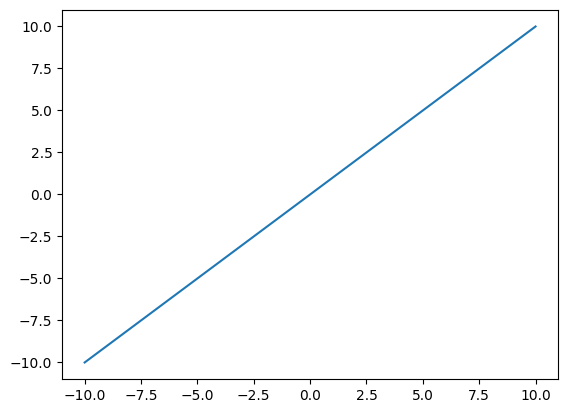

In [66]:
# x = y
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

In [67]:
# y = x^2

x = np.linspace(-10,10,100)
y = x**2

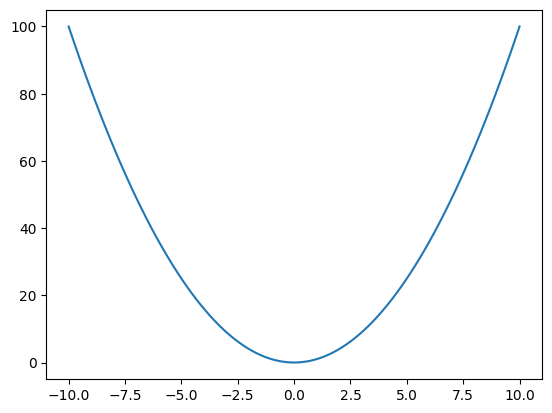

In [68]:
plt.plot(x,y)

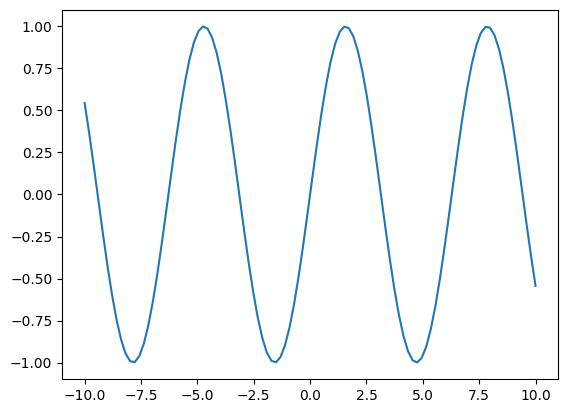

In [69]:
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\tanis\AppData\Local\Temp\ipykernel_3108\3899969729.py:5: RuntimeWarning: invalid value encountered in log
  y = x* np.log(x)


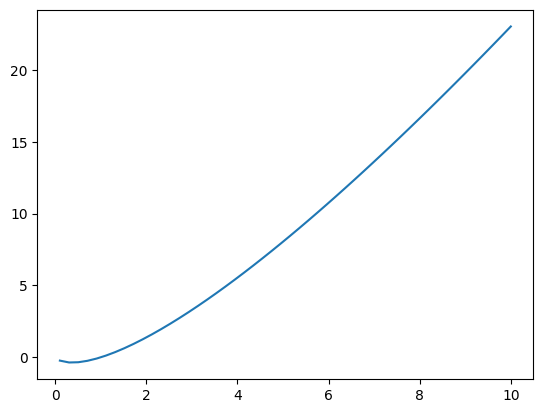

In [70]:
# y = xlog(x)

x = np.linspace(-10,10,100)

y = x* np.log(x)

plt.plot(x,y)

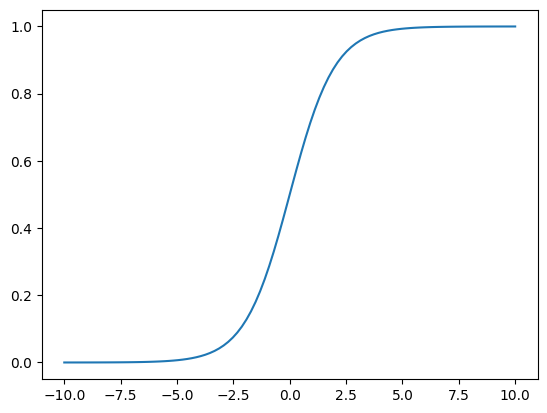

In [71]:
# sigmoid

x = np.linspace(-10,10,100)

y = 1/(1+ np.exp(-x))

plt.plot(x,y)

# Meshgrids